In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns

In [2]:
train=pd.read_csv('train_upd.csv')
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [4]:
train.shape

(78560, 39)

In [5]:
lb1=LabelEncoder()
train['ran_vendor']=lb1.fit_transform(train['ran_vendor'])

In [6]:
lb2=LabelEncoder()
train['Congestion_Type']=lb1.fit_transform(train['Congestion_Type'])

In [7]:
del train['par_year']

In [8]:
del train['par_month']

<BarContainer object of 78560 artists>

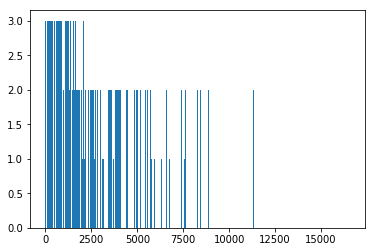

In [9]:
plt.bar(train['subscriber_count'],train['Congestion_Type'])

In [10]:
train.head()

,cell_name,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,15,0,50,152,315,59012,2266,1034,...,10,33,46,39,103,69,6,2,0,1
1,4826375369,1,7,20,5,54,1871,334,4530,63,...,22,20,7,10,21,93,7,5,2,3
2,3607540856,1,5,16,35,277,887,945,23753,171,...,14,91,49,147,159,77,6,3,0,0
3,1245076813,0,16,21,60,51,8577,494,7956,66,...,10,63,42,75,35,95,7,2,1,0
4,404129745,1,4,6,60,117,2084,1056,7244,232,...,67,59,91,197,316,112,3,5,1,2


# If subscriber_count is greater then 2200 it cant be congestion_type '3' NC

In [12]:
train[train['subscriber_count']>2000][train['Congestion_Type']==3]

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,cell_name,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
21160,1764457306,1,15,20,50,2053,37,545,4373,957,...,7,8,4,0,38,104,2,5,0,3
23478,4107065657,0,19,6,20,2016,4390,2266,7939,93,...,28,7,13,8,7,110,7,5,1,3
34916,4121738340,0,15,2,20,2035,1841,158,17158,112,...,14,4,13,26,17,82,6,5,0,3
43602,3730582871,1,18,19,35,2177,299,502,345,6,...,74,3,32,9,26,109,2,2,1,3
49407,3255896905,1,5,8,45,2074,279,1455,682,91,...,11,2,29,69,2,94,7,5,2,3
55063,44089228,0,7,20,25,2093,2980,1737,8859,102,...,6,7,0,8,9,101,2,2,1,3
55427,4600684463,1,11,13,60,2173,356,4196,213,137,...,19,36,57,26,3,60,7,2,2,3
67314,3001207516,0,30,19,35,2092,711,1393,844,47,...,25,5,17,46,74,101,5,2,2,3


# If subscriber_count is greater then 9000 it has to be congestion_type '2' 4G_RAN_CONGESTION

In [13]:
train[train['subscriber_count']>8000][train['Congestion_Type']==1]

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,cell_name,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
5491,2742036518,1,17,10,25,8449,8688,507,1329,11,...,8,64,63,10,67,111,4,3,0,1
18770,3490922076,0,25,23,25,8740,12841,5093,2558,53,...,57,283,1,53,114,105,4,2,2,1
20051,3444707213,1,5,4,10,8890,661,2685,980,16,...,6,19,18,73,4,84,3,3,2,1
38212,3768328563,1,17,12,20,8485,46005,4530,389,184,...,1,1,92,11,3,75,7,3,2,1
46731,2616935541,0,3,17,45,8115,1661,19173,422,41,...,7,142,87,122,220,62,3,2,2,1
54564,1177156599,0,18,7,30,8486,6554,613,486,233,...,134,19,25,24,11,69,5,2,2,1
62026,145875609,0,6,18,55,8223,1065,72,330,155,...,40,43,72,19,43,65,3,2,1,1
63968,1736183673,0,5,23,60,8271,2127,3064,2359,3159,...,15,84,165,8,79,119,7,2,2,1
76156,5108818374,1,30,14,55,8160,13275,253,1192,442,...,2,4,33,15,8,67,6,4,0,1
